# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from utils import *
from mc_coral_classifier import *

2023-10-26 09:49:08.779319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 09:49:08.955932: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-26 09:49:08.989052: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-26 09:49:08.989078: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Please install GPU version of TF


2023-10-26 09:57:45.951712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 09:57:47.155358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-26 09:57:47.155651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-26 09:57:47.155709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror

In [3]:
image = tf.keras.utils.load_img("sponge.png")

In [4]:
folder_path = "Dataset_generated"
images, labels = read_images_in_folder(folder_path)
print(f"Total number of images: {len(images)}")
print(f"Total number of labels: {len(labels)}")
distinct_labels = list(set(labels))

print(distinct_labels)

Total number of images: 3994
Total number of labels: 3994
['Cup-likes sponges', 'Sea Cucumber', 'Colonial Unstalked Ascidian', 'Sea urchins', 'True lobsters', 'General unknown biology', 'Octopods', 'Anthomastus Like coral', 'Feather stars', 'Hermit Crab with Shell or Stone', 'Tube worms', 'Laminar Erect sponges', 'Irregular urchins', 'Snake stars', 'Attached Stony coral', 'Quill (Sea pen) coral', 'Arborescent Stumpy Grey Branching Erect sponges', 'Woody debris', 'Other anemones', 'Eels', 'Squat lobsters', 'Sea whip coral', 'Simple Branching coral', 'Arborescent coral', 'Ctenophores jellies', 'Free-living coral', 'Bony fishes', 'Crab', 'Tube anemones', 'Bioturbation - Organism tests', 'Prawns - Shrimps - Mysids', 'Stalked Erect sponges', 'Sea stars']


In [5]:
train_labels, val_labels, test_labels, all_labels = read_preprocess_data()

Total number of images: 3994
Total number of labels: 3994
['Cup-likes sponges', 'Sea Cucumber', 'Colonial Unstalked Ascidian', 'Sea urchins', 'True lobsters', 'General unknown biology', 'Octopods', 'Anthomastus Like coral', 'Feather stars', 'Hermit Crab with Shell or Stone', 'Tube worms', 'Laminar Erect sponges', 'Irregular urchins', 'Snake stars', 'Attached Stony coral', 'Quill (Sea pen) coral', 'Arborescent Stumpy Grey Branching Erect sponges', 'Woody debris', 'Other anemones', 'Eels', 'Squat lobsters', 'Sea whip coral', 'Simple Branching coral', 'Arborescent coral', 'Ctenophores jellies', 'Free-living coral', 'Bony fishes', 'Crab', 'Tube anemones', 'Bioturbation - Organism tests', 'Prawns - Shrimps - Mysids', 'Stalked Erect sponges', 'Sea stars']
Train images shape: (2667, 250, 250, 3)
Train labels shape: (2667,)
Validation images shape: (667, 250, 250, 3)
Validation labels shape: (667,)
Test images shape: (660, 250, 250, 3)
Test labels shape: (660,)
Folder 'preprocessed_data' and i

In [6]:
print(np.setdiff1d(train_labels, val_labels))
print(np.setdiff1d(val_labels, train_labels))

[]
[]


In [7]:
print(np.setdiff1d(train_labels, test_labels))
print(np.setdiff1d(test_labels, train_labels))

[]
[]


## Plot the data 

In [8]:
IMG_SIZE = 250
train_labels, val_labels, test_labels, labels = read_preprocess_data()
df = pd.DataFrame(labels, columns = ['name'])

df_grouped = df.groupby(['name']).agg(
    instances=pd.NamedAgg(column="name", aggfunc="count")
   
)
#df_grouped.reset_index(inplace=True)
sorted_df = df_grouped.sort_values(by='instances',ascending=False, inplace=False)
df_grouped.to_csv("data.csv",index=True)

Total number of images: 3994
Total number of labels: 3994
['Cup-likes sponges', 'Sea Cucumber', 'Colonial Unstalked Ascidian', 'Sea urchins', 'True lobsters', 'General unknown biology', 'Octopods', 'Anthomastus Like coral', 'Feather stars', 'Hermit Crab with Shell or Stone', 'Tube worms', 'Laminar Erect sponges', 'Irregular urchins', 'Snake stars', 'Attached Stony coral', 'Quill (Sea pen) coral', 'Arborescent Stumpy Grey Branching Erect sponges', 'Woody debris', 'Other anemones', 'Eels', 'Squat lobsters', 'Sea whip coral', 'Simple Branching coral', 'Arborescent coral', 'Ctenophores jellies', 'Free-living coral', 'Bony fishes', 'Crab', 'Tube anemones', 'Bioturbation - Organism tests', 'Prawns - Shrimps - Mysids', 'Stalked Erect sponges', 'Sea stars']
Train images shape: (2667, 250, 250, 3)
Train labels shape: (2667,)
Validation images shape: (667, 250, 250, 3)
Validation labels shape: (667,)
Test images shape: (660, 250, 250, 3)
Test labels shape: (660,)
Folder 'preprocessed_data' and i

In [9]:

df_split = np.array_split(sorted_df, 10)
df_split[0]

instances
name                                
Prawns - Shrimps - Mysids        601
Tube worms                       510
Sea urchins                      454
Attached Stony coral             338

                        name  instances
0  Prawns - Shrimps - Mysids        601
1                 Tube worms        510
2                Sea urchins        454
3       Attached Stony coral        338
                                              name  instances
0                                      Bony fishes        234
1                                   Squat lobsters        198
2  Arborescent Stumpy Grey Branching Erect sponges        191
3                      Colonial Unstalked Ascidian        178
             name  instances
0    Sea Cucumber        134
1            Eels        132
2     Snake stars        108
3  Other anemones         93
                            name  instances
0  Bioturbation - Organism tests         85
1        General unknown biology         67
2                  Feather stars         62
                name  instances
0  Irregular urchins         58
1          Sea stars         57
2     Sea whip coral         56
                name  instances
0  Arbore

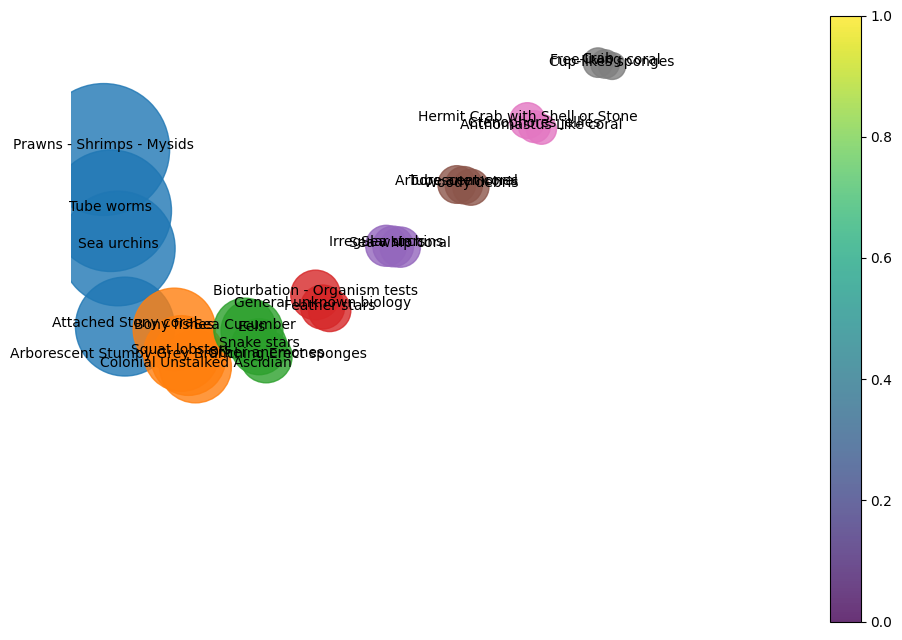

In [10]:
plt.figure(figsize=(10,6.5))
factor=10
yfactor = 100
for df in df_split:
    df.reset_index(inplace=True)
    print(df.head())
    
    plt.scatter(x=df.index.values +factor ,y=df.instances.values+yfactor,alpha=0.8, s=df.instances.values*15)
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xticks(rotation = 45)
    
    #plt.xlim(-20,50)
    plt.ylim(0,900)
    plt.axis('off')
    
    for i, txt in enumerate(df.name.values):
        plt.annotate(txt[:], (df.index.values[i]+factor, df.instances.values[i]+yfactor),ha='center')

    factor += 10
    yfactor += 100
plt.colorbar()
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig("data.png")

In [11]:
df_grouped.reset_index(inplace=True)

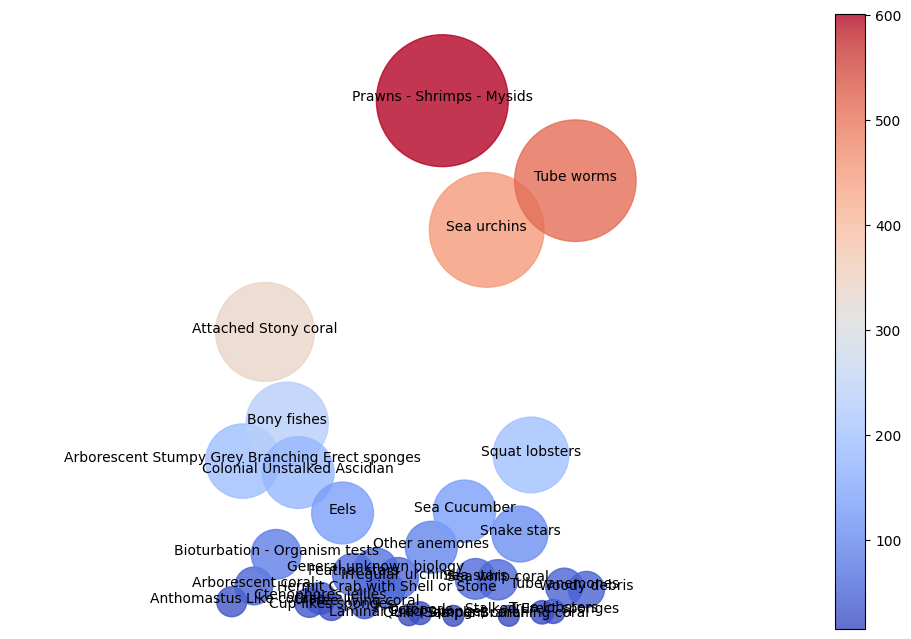

In [12]:
plt.figure(figsize=(10,6.5))
factor=10

#for row in range (1,len(df_grouped.index.values),1):   
plt.scatter(x=df_grouped.index.values,y=df_grouped.instances.values,alpha=0.8, s=df_grouped.instances.values*15, c=df_grouped.instances.values, cmap='coolwarm')
for i, txt in enumerate(df_grouped.name.values):
    plt.annotate(txt[:], (df_grouped.index.values[i], df_grouped.instances.values[i]),ha='center')

#plt.yscale('log')
#plt.xscale('log')
plt.xlim(-20,50)
plt.ylim(0,700)
plt.axis('off')
plt.colorbar()
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig("data.png")

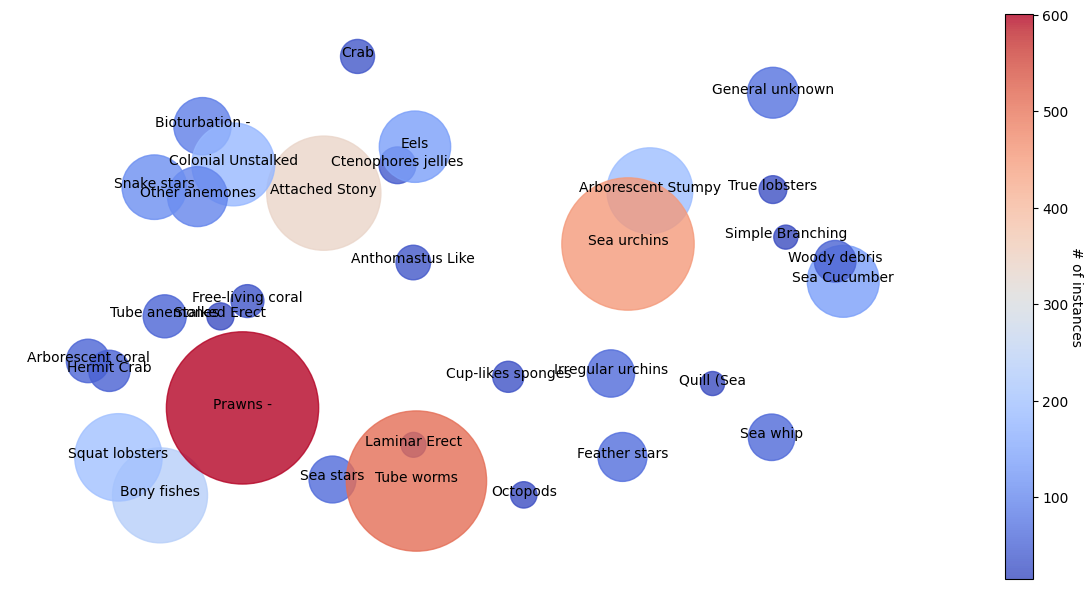

In [13]:

for seed in range(1,2,1):
    np.random.seed(seed)

    plt.figure(figsize=(12,6))
    
    
    N=len(df_grouped.index.values)
    x = np.random.uniform(-100,100,N)
    y = np.random.uniform(-300,300,N)
    
    # a = np.zeros(np.size(x), dtype=bool)
    # b = np.sqrt(x**2+y**2)
    
    # for i in range(np.size(x)):
    #     if (max(abs(x[i]), abs(y[i]))>5) & (b[i] < 10):
    #         a[i] = True
    #     else:
    #         a[i] = False
    # x = x[a]
    # y = y[a]
    
    plt.scatter(x=x,y=y,alpha=0.8, s=df_grouped.instances.values*20, c=df_grouped.instances.values, cmap='coolwarm')
    for i, txt in enumerate(df_grouped.name.values):
        txts = txt.split(" ")
        if len(txts)>1:
            plt.annotate(txts[0]+ " " + txts[1], (x[i], y[i]),ha='center')
        else:
            plt.annotate(txts[0], (x[i], y[i]),ha='center')
    
    plt.xlim(-120,120)
    plt.ylim(-400,350)
    plt.axis('off')
    cbar = plt.colorbar()
    cbar.set_label('# of instances', rotation=270, labelpad= 10 )
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()
    plt.savefig("data/data"+str(seed)+".png")

In [14]:
def plot_multiclass_roc_new(ground_truth, scores, class_labels, results_folder):
    # Convert ground truth labels to one-hot encoded form
    n_classes = len(class_labels)
    ground_truth_binary = label_binarize(ground_truth, classes=range(n_classes))

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ground_truth_binary[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Sort the dictionaries based on AUC values
    sorted_indices = np.argsort(list(roc_auc.values()))
    sorted_fpr = [fpr[i] for i in sorted_indices]
    sorted_tpr = [tpr[i] for i in sorted_indices]
    sorted_auc = [roc_auc[i] for i in sorted_indices]
    sorted_class_labels = [class_labels[i] for i in sorted_indices]

    print(sorted_class_labels)
    # Create subplots, with each subplot showing ROC curves for 7 classes
    num_per_subplots = int(np.ceil(n_classes / 4))  # Change the number of columns here
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))  # Use 2 columns

    print(num_per_subplots)
    start_class = 0
    for subplot_id, ax_row in enumerate(axs):
        for col_id, ax in enumerate(ax_row):
            
            end_class = min(start_class + num_per_subplots, n_classes)
            for class_id in range(start_class, end_class):
                ax.plot(sorted_fpr[class_id], sorted_tpr[class_id], lw=2, label=f'{sorted_class_labels[class_id]} (AUC = {sorted_auc[class_id]:.2f})')

            ax.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'ROC Curves for AUC Values {sorted_auc[start_class]:.2f} to {sorted_auc[end_class - 1]:.2f}')
            ax.legend(loc='lower right', fontsize='small')
            start_class += num_per_subplots
        
    plt.tight_layout()
    plt.savefig(results_folder + "_roc_auc.png")
    plt.show()



In [15]:
def test_model_new(train_ds, test_ds, results_folder,train_model):
    
    model = None
    if train_model==True:
        model = load_model(results_folder+"_Model.h5")
    else:
        model = load_model("results/results_104/InceptionResNetV2_Model.h5")
           
    pred= model.predict(test_ds, verbose=0)
    
    
    
    predicted_class_indices=np.argmax(pred,axis=1)
    labels = (train_ds.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    
    
    test_labels = []
    test_images = []
    for i in range(len(test_ds)):
        batch_images, batch_labels = test_ds[i]
        test_labels.extend(tf.argmax(batch_labels, axis=1).numpy())
        test_images.extend(batch_images)
    
    # Convert test_labels to a numpy array
    test_labels = tf.convert_to_tensor(test_labels)
       
    
    
    print(np.array(predicted_class_indices).shape)
    print(np.array(test_labels).shape)
    
    y_true = np.array(test_labels)
    y_pred = np.array(predicted_class_indices)
    class_labels = list(train_ds.class_indices.keys())
    
    #plot_confusion_matrix(y_true, y_pred, classes=class_labels, results_folder)
    
    plot_confusion_matrix(y_true, y_pred, class_labels,results_folder, normalize=True)
    
    print(classification_report(y_true, y_pred, target_names=class_labels))
    
    #plot samlpe model output
    #prediction_titles = [
     #   title(y_pred, y_true, class_labels, i) for i in range(y_pred.shape[0])
    #]

    #plot_gallery(test_images, prediction_titles, IMG_SIZE, IMG_SIZE)
    
    if False:
        x,y = next(test_ds)
        print(x.shape) # input shape of one record is (IMG_SIZE,IMG_SIZE,3) , 32: is the batch size
        a = train_ds.class_indices
        class_names = list(a.keys())  # storing class/breed names in a list 
        model.predict(x,y,verbose=1)
        plot_images(x,y,class_names)

    #fpr_tpr_roc_auc = plot_multiclass_roc_new(y_true, pred, class_labels, results_folder )
    
    return  y_true, pred, class_labels, results_folder

## Test Run Model

In [16]:
print("Starting Experiments")
# Specify the directory path
directory_path = "results"

# Create the new results folder
results_folder = create_results_folder(directory_path)

# Print the path of the new results folder
print("New results folder created:", results_folder)

train_model= False

# load data for training
train_data_dir = 'preprocessed_data/train'
test_data_dir = 'preprocessed_data/test'
val_data_dir = 'preprocessed_data/validation'

preprocessing_function = None

train_ds, test_ds, validation_ds = load_image_data(train_data_dir, test_data_dir, val_data_dir,preprocessing_function)

y_true, pred, class_labels, results_folder = test_model_new(train_ds, test_ds, results_folder,train_model)

# Assuming you have defined y_true, pred, class_labels, and results_folder
plot_multiclass_roc_new(y_true, pred, class_labels, results_folder)

Starting Experiments
New results folder created: results/results_124
Found 2667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Found 667 images belonging to 33 classes.


ValueError: bad marshal data (unknown type code)

# Train Model and then test

In [ ]:


print(tf.config.list_physical_devices('GPU'))
#return

print("Starting Experiments")
# Specify the directory path
directory_path = "results"

# Create the new results folder
results_folder = create_results_folder(directory_path)

# Print the path of the new results folder
print("New results folder created:", results_folder)

IMG_SIZE = 256
    

train_model = True

if train_model==True:
    
    
    base_model = None
    preprocessing_function = None
    
    test_acc_list = []
    test_per_class_summary = []
    model_list = ['InceptionResNetV2']#, 'VGG16', 'VGG19']# ,'ResNet50', 'ResNet101','ResNet152' ,'InceptionV3' , 'DenseNet121','DenseNet169',  'DenseNet201']
    
    for model_name in model_list:
        
        
        if model_name == 'InceptionResNetV2':
            # load the InceptionResNetV2 architecture with imagenet weights as base
            #from keras.applications.inceptionresnetv2 import preprocess_input
            #preprocessing_function = preprocess_input
            base_model = tf.keras.applications.InceptionResNetV2( include_top=False, weights='imagenet', input_shape=(IMG_SIZE,IMG_SIZE,3))
        
        elif model_name == 'VGG16':
            from keras.applications.vgg16 import preprocess_input 
            preprocessing_function = preprocess_input
            base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
        
        elif model_name == "VGG19":
            from keras.applications.vgg19 import preprocess_input
            preprocessing_function = preprocess_input
            base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
        
        elif model_name == "ResNet50":
            from keras.applications.resnet50 import preprocess_input
            preprocessing_function = preprocess_input
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
       
        elif model_name == "ResNet101":
            from keras.applications.resnet101 import preprocess_input
            preprocessing_function = preprocess_input
            base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
            
        elif model_name == "ResNet152":
            from keras.applications.resnet152 import preprocess_input
            preprocessing_function = preprocess_input
            base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
            
        elif model_name == "InceptionV3":
            from keras.applications.inception_v3 import preprocess_input
            preprocessing_function = preprocess_input
            base_model = InceptionV3(weights='imagenet', include_top=False,  input_shape=(IMG_SIZE,IMG_SIZE,3))
            
        elif model_name == "DenseNet121":
            from keras.applications.densenet import preprocess_input
            preprocessing_function = preprocess_input
            base_model = DenseNet121(weights='imagenet', include_top=False,  input_shape=(IMG_SIZE,IMG_SIZE,3))
            
        elif model_name == "DenseNet169":
            from keras.applications.densenet import preprocess_input
            preprocessing_function = preprocess_input
            base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
        
        elif model_name == "DenseNet201":
            from keras.applications.densenet import preprocess_input
            preprocessing_function = preprocess_input
            base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
            
    
        base_model.trainable=False
        # For freezing the layer we make use of layer.trainable = False
        # means that its internal state will not change during training.
        # model's trainable weights will not be updated during fit(),
        # and also its state updates will not run.
        
        # load data for training
        train_data_dir = 'preprocessed_data/train'
        test_data_dir = 'preprocessed_data/test'
        val_data_dir = 'preprocessed_data/validation'

        train_ds, test_ds, validation_ds = load_image_data(train_data_dir, test_data_dir, val_data_dir,preprocessing_function)
        
        x,y = next(train_ds)
        print(x.shape) # input shape of one record is (IMG_SIZE,IMG_SIZE,3) , 32: is the batch size
        a = train_ds.class_indices
        class_names = list(a.keys())  # storing class/breed names in a list 
        plot_images(x,y,class_names)
        
        # Print the number of classes and the class labels
        num_classes = train_ds.num_classes
        print("Number of classes:", num_classes)
        print("Class labels:", class_names)
        
        
        #create transfer learning model
        model = tf.keras.Sequential([
                base_model,  
                tf.keras.layers.BatchNormalization(renorm=True),
                tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(num_classes, activation='softmax')
            ])
        
        model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
        # categorical cross entropy is taken since its used as a loss function for
        # multi-class classification problems where there are two or more output labels.
        # using Adam optimizer for better performance
        
        
        model.summary()
        
        EPOCHS = 25
        batch_size=32
        STEP_SIZE_TRAIN = train_ds.n//train_ds.batch_size
        STEP_SIZE_VALID = validation_ds.n//validation_ds.batch_size
        
        
        early = tf.keras.callbacks.EarlyStopping( patience=10,
                                                  min_delta=0.001,
                                                  restore_best_weights=True)
        # early stopping call back
        
        
        # fit model
        history = model.fit(train_ds,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=validation_ds,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=EPOCHS,
                            callbacks=[early])
        
                      
        model.save(results_folder+"/"+model_name+"_Model.h5")
        
        
        # store results
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        
         
        plot_train_accuracy_loss(acc, val_acc, loss, val_loss, results_folder+"/"+model_name)
        
        
        accuracy_score = model.evaluate(test_ds)
        print(accuracy_score)
        print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
        print("Loss: ",accuracy_score[0])
        
        test_acc_list.append(accuracy_score[1] * 100)
        
        
        y_true, pred, class_labels, results_folder = test_model_new(train_ds, test_ds, results_folder+"/"+model_name ,train_model)

        summary_results = plot_multiclass_roc_new(y_true, pred, class_labels, results_folder)
        
        mod_details = [model_name, EPOCHS, accuracy_score[1] * 100]
        
        
        
        append_dict_list_to_csv(summary_results, mod_details, class_names ,results_folder+"/model_summaries.csv")
       
        
    
    plot_model_accuracies(model_list,test_acc_list,results_folder)
        
else:
    
    # load data for training
    train_data_dir = 'preprocessed_data/train'
    test_data_dir = 'preprocessed_data/test'
    val_data_dir = 'preprocessed_data/validation'

    preprocessing_function = None
    
    train_ds, test_ds, validation_ds = load_image_data(train_data_dir, test_data_dir, val_data_dir,preprocessing_function)
    
    test_model_new(train_ds, test_ds, results_folder,train_model)

[]
Starting Experiments
New results folder created: results/results_125
Found 2667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
(32, 250, 250, 3)
Number of classes: 33
Class labels: ['Anthomastus Like coral', 'Arborescent Stumpy Grey Branching Erect sponges', 'Arborescent coral', 'Attached Stony coral', 'Bioturbation - Organism tests', 'Bony fishes', 'Colonial Unstalked Ascidian', 'Crab', 'Ctenophores jellies', 'Cup-likes sponges', 'Eels', 'Feather stars', 'Free-living coral', 'General unknown biology', 'Hermit Crab with Shell or Stone', 'Irregular urchins', 'Laminar Erect sponges', 'Octopods', 'Other anemones', 'Prawns - Shrimps - Mysids', 'Quill (Sea pen) coral', 'Sea Cucumber', 'Sea stars', 'Sea urchins', 'Sea whip coral', 'Simple Branching coral', 'Snake stars', 'Squat lobsters', 'Stalked Erect sponges', 'True lobsters', 'Tube anemones', 'Tube worms', 'Woody debris']
Model: "sequential_3"
_______________________

In [19]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [27]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print(X.shape, y.shape)

# [out] (70000, 784) (70000,)

(1797, 64) (1797,)


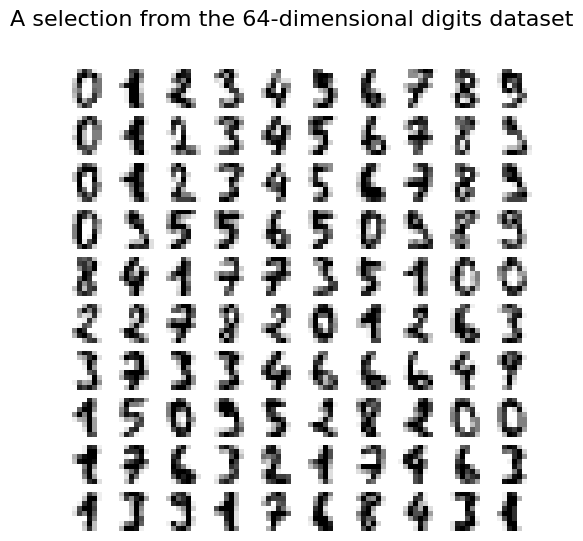

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [29]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1797, 66)


In [30]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [43]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print("Explained variation per principal component: {}".format(pca.explained_variance_ratio_))

# Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [0.14890594 0.13618771 0.11794594]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

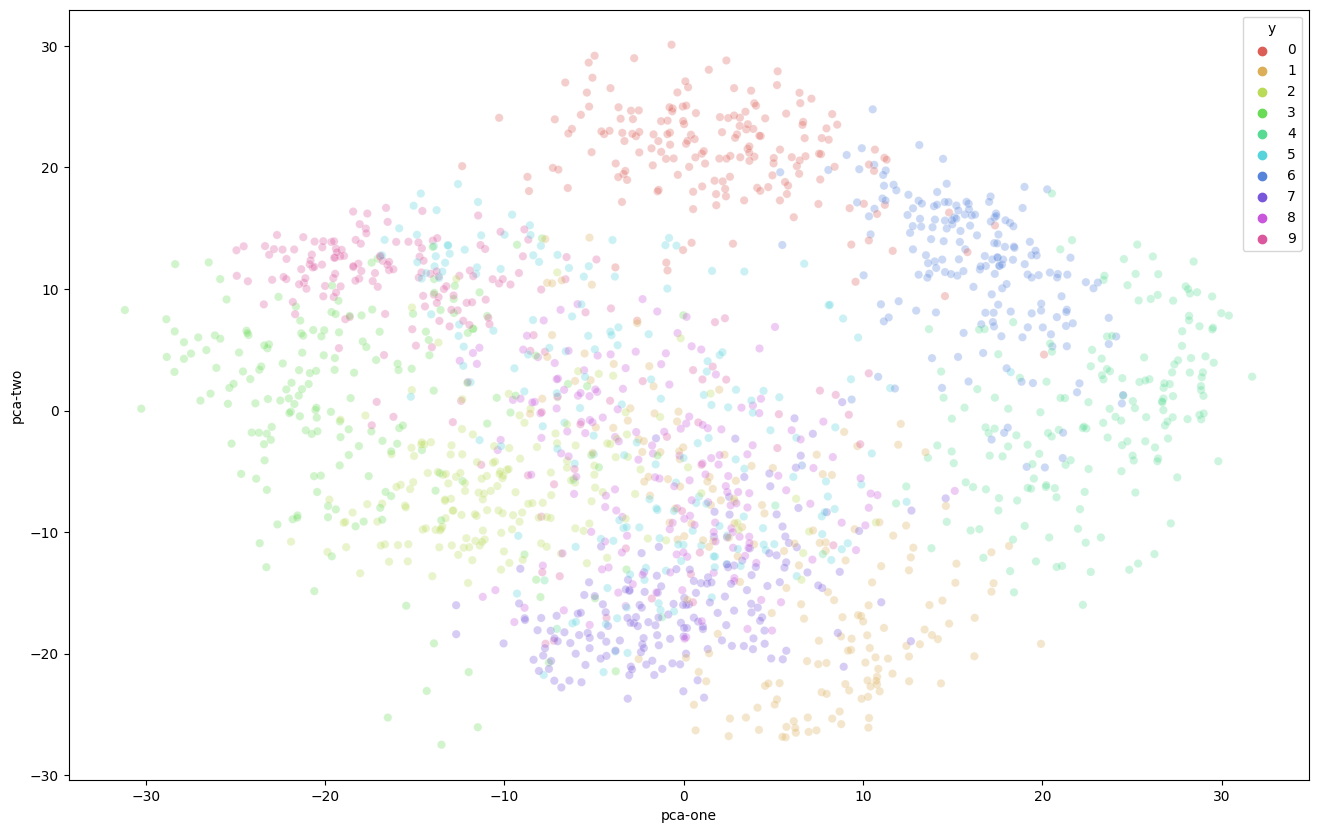

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

/tmp/ipykernel_10326/1801808602.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


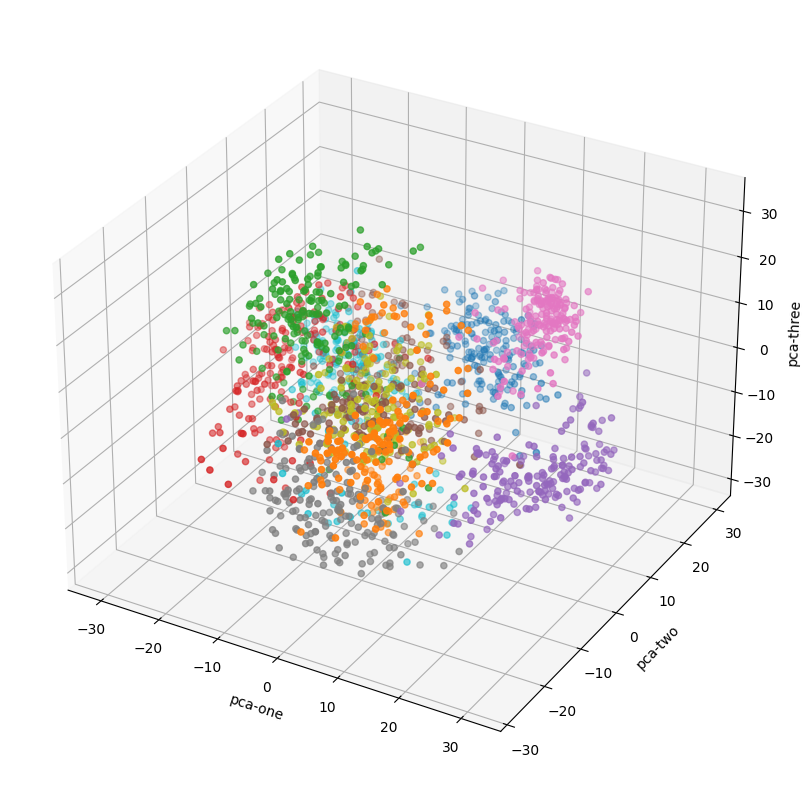

In [45]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [46]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.14890594 0.13618771 0.11794594]


In [47]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 12.437878
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.036751
[t-SNE] KL divergence after 300 iterations: 1.190090
t-SNE done! Time elapsed: 1.814457654953003 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

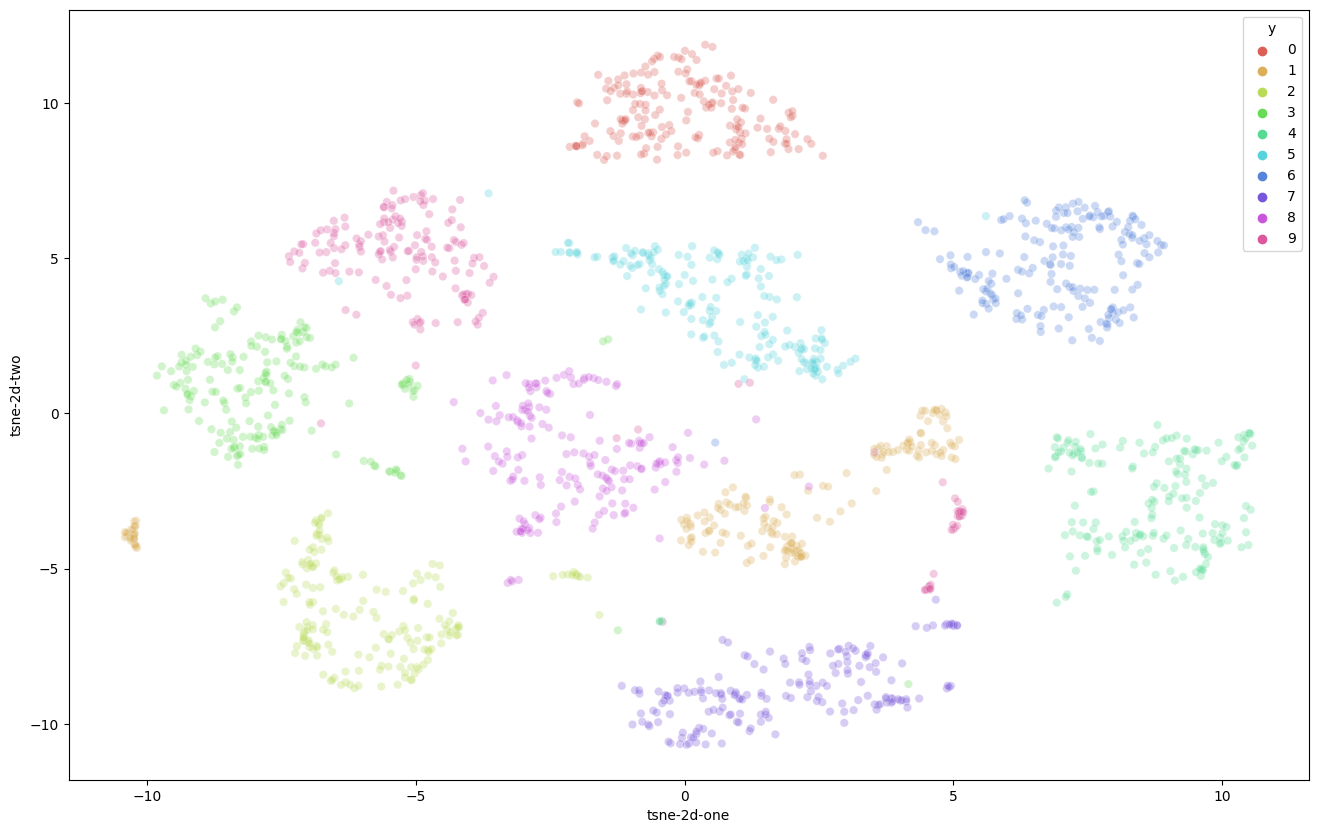

In [48]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

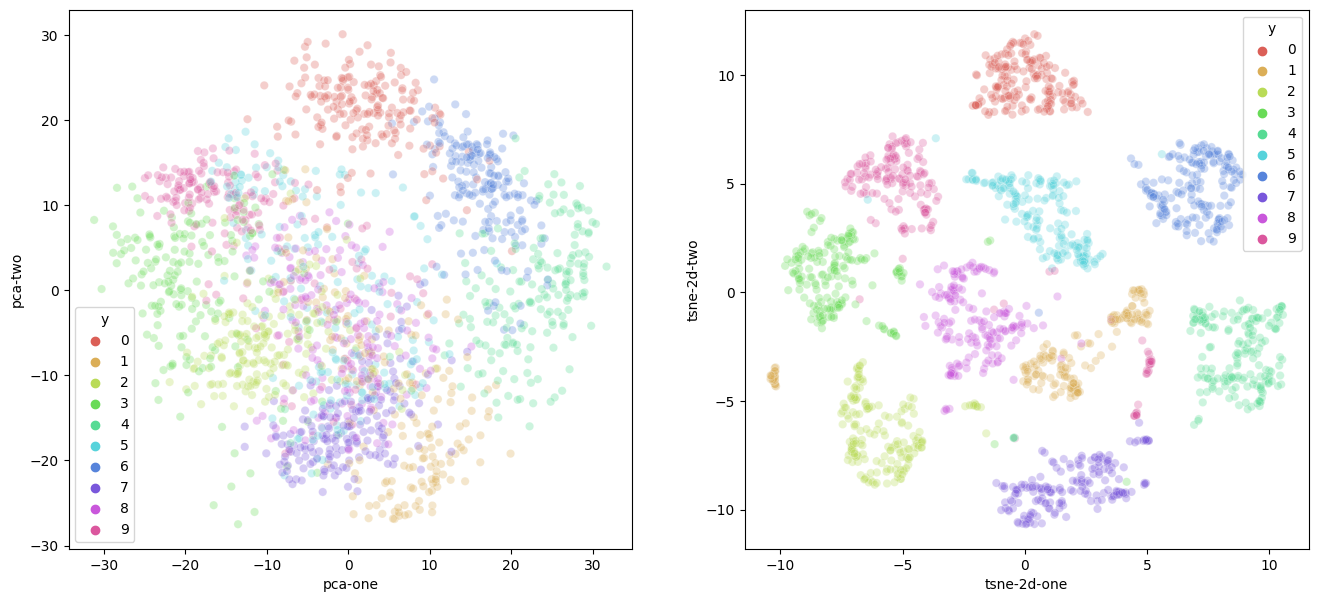

In [49]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [50]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


Cumulative explained variation for 50 principal components: 0.9995471140234802


In [51]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 1.6095659732818604 seconds


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

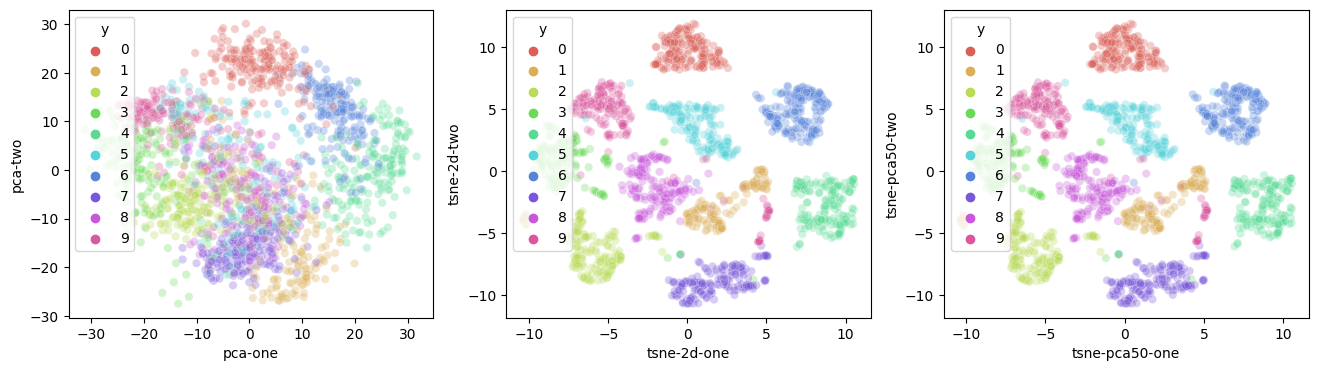

In [52]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Starting Experiments
New results folder created: results/results_112
Found 2667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.
Found 667 images belonging to 33 classes.


2023-09-11 14:17:05.137745: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-11 14:17:05.137774: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-11 14:17:12.638672: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-09-11 14:17:12.638713: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

(660,)
(660,)


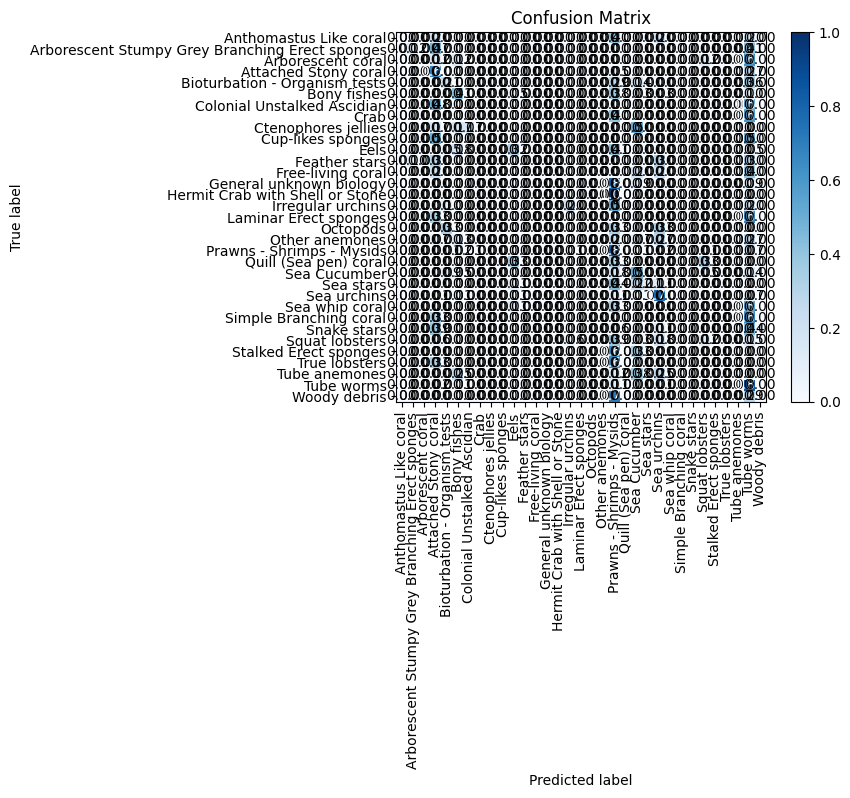

/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

                                                 precision    recall  f1-score   support

                         Anthomastus Like coral       0.00      0.00      0.00         5
Arborescent Stumpy Grey Branching Erect sponges       0.80      0.12      0.22        32
                              Arborescent coral       0.00      0.00      0.00         8
                           Attached Stony coral       0.41      0.68      0.51        56
                  Bioturbation - Organism tests       0.33      0.21      0.26        14
                                    Bony fishes       0.52      0.41      0.46        39
                    Colonial Unstalked Ascidian       0.00      0.00      0.00        29
                                           Crab       0.00      0.00      0.00         5
                            Ctenophores jellies       0.00      0.00      0.00         6
                              Cup-likes sponges       0.00      0.00      0.00         4
                    

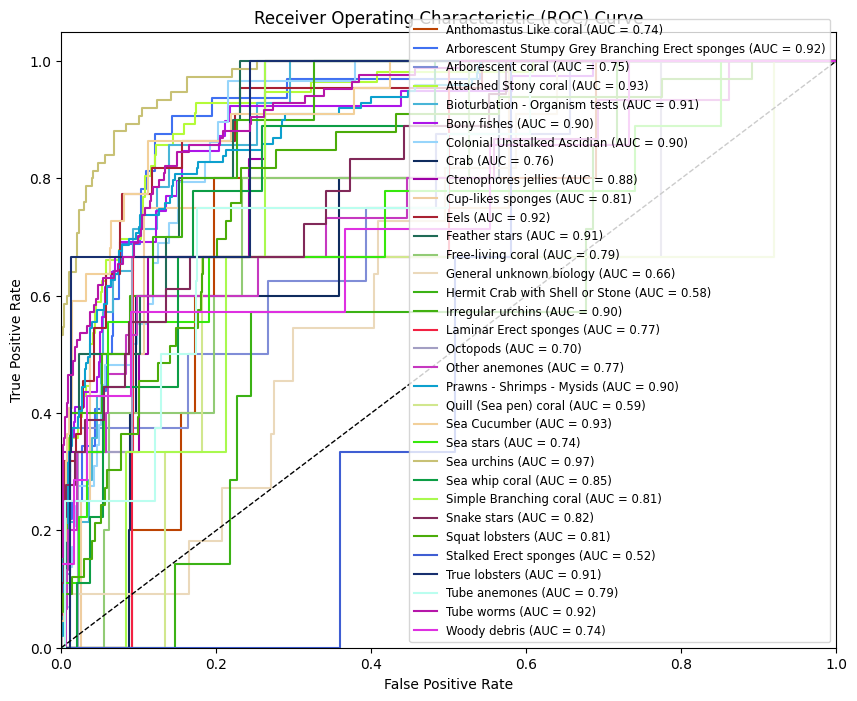

In [2]:


def read_images_in_folder(folder_path):
    image_list = []
    labels = []
    
  
    
    

    resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),layers.Rescaling(1./255)])

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                image_path = os.path.join(root, file)
                try:
                    image = tf.keras.preprocessing.image.load_img(image_path,target_size=[IMG_SIZE,IMG_SIZE])
                    #image = resize_and_rescale(image)
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    image_list.append(image)
                    
                    label = os.path.basename(root)  # Assuming folder names are the labels
                    labels.append(label)
                except (IOError, OSError):
                    print(f"Error opening image: {image_path}")
    return image_list, labels


def save_images_to_folder(images, labels, folder_path):
    i = 1
    for image, label in zip(images, labels):
        label_folder = os.path.join(folder_path, label)
        os.makedirs(label_folder, exist_ok=True)
        
        image_filename = os.path.join(label_folder, f"{label}_{i}_image.jpg")
        tf.keras.preprocessing.image.save_img(image_filename, image)
        i+=1


def read_preprocess_data():

    folder_path = "Dataset_generated"
    images, labels = read_images_in_folder(folder_path)
    print(f"Total number of images: {len(images)}")
    print(f"Total number of labels: {len(labels)}")
    distinct_labels = list(set(labels))
    
    print(distinct_labels)
    
    
    # Convert the image and label lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    
    
    # Perform train-test-validation split
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.165, random_state=42)
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
    
    # Print the shapes of train, validation, and test sets
    print("Train images shape:", train_images.shape)
    print("Train labels shape:", train_labels.shape)
    print("Validation images shape:", val_images.shape)
    print("Validation labels shape:", val_labels.shape)
    print("Test images shape:", test_images.shape)
    print("Test labels shape:", test_labels.shape)
            
    # Create "data" folder
    data_folder = "preprocessed_data"
    
    if os.path.exists(data_folder):
        shutil.rmtree(data_folder)
        print(f"Folder '{data_folder}' and its contents have been removed.")
    else:
        print(f"Folder '{data_folder}' does not exist.")
        
    os.makedirs(data_folder, exist_ok=True)
    
    # Save train images to folder
    train_folder = os.path.join(data_folder, "train")
    save_images_to_folder(train_images, train_labels, train_folder)
    
    # Save test images to folder
    test_folder = os.path.join(data_folder, "test")
    save_images_to_folder(test_images, test_labels, test_folder)
    
    # Save validation images to folder
    val_folder = os.path.join(data_folder, "validation")
    save_images_to_folder(val_images, val_labels, val_folder)
    return labels


In [2]:
import tensorflow as tf
import os

2023-08-23 12:52:54.514664: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-08-23 12:52:56.275771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-23 12:52:56.300866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-23 12:52:56.300994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 336 files belonging to 2 classes.


2023-08-23 12:53:16.031280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 12:53:16.031785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-23 12:53:16.031936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-23 12:53:16.032005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

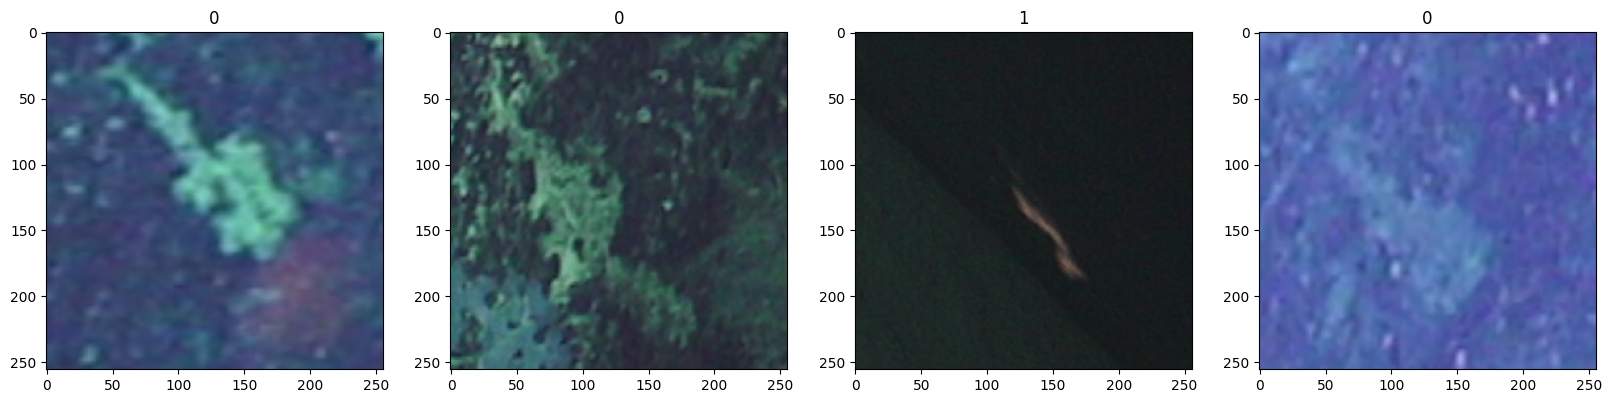

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.24705882, 0.4117647 , 0.5372549 ],
          [0.24191177, 0.4053309 , 0.53125   ],
          [0.22279412, 0.3814338 , 0.50894606],
          ...,
          [0.22757353, 0.33915442, 0.49803922],
          [0.22438726, 0.34074754, 0.49803922],
          [0.22352941, 0.34117648, 0.49803922]],
 
         [[0.23429841, 0.39750308, 0.52674633],
          [0.22931555, 0.39139763, 0.5210698 ],
          [0.21080777, 0.36872032, 0.49998564],
          ...,
          [0.22418405, 0.3357649 , 0.49842626],
          [0.2213027 , 0.337663  , 0.49812132],
          [0.22052696, 0.33817402, 0.49803922]],
 
         [[0.20356923, 0.3631587 , 0.5014399 ],
          [0.19898179, 0.35784408, 0.49655426],
          [0.18194269, 0.33810413, 0.47840744],
          ...,
          [0.21602161, 0.3276025 , 0.4993583 ],
          [0.21387461, 0.33023492, 0.49831903],
          [0.21329656, 0.3309436 , 0.49803922]],
 
         ...,
 
         [[0.22233456, 0.3164522 , 0.46683517],
          [0.22061

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-08-23 12:53:53.253585: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 126.01MiB (rounded to 132128768)requested by op sequential/conv2d/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-08-23 12:53:53.253611: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2023-08-23 12:53:53.253616: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 57, Chunks in use: 57. 14.2KiB allocated for chunks. 14.2KiB in use in bin. 1.1KiB client-requested in use in bin.
2023-08-23 12:53:53.253619: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 512B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-08-23 12:53:53.253623:

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_13837/2029832520.py", line 1, in <module>
      hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/ratneel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
OOM when allocating tensor with shape[32,16,254,254] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1027]

# 8. Plot Performance

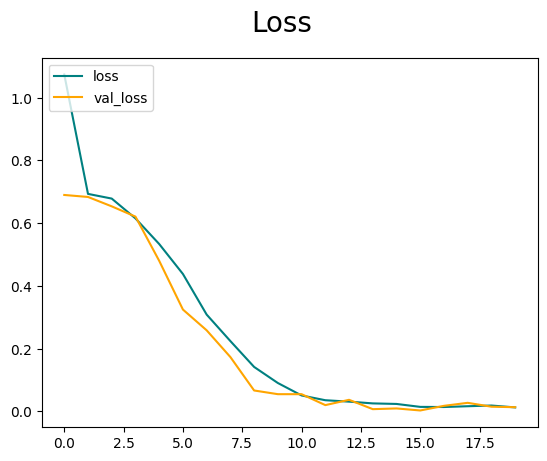

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

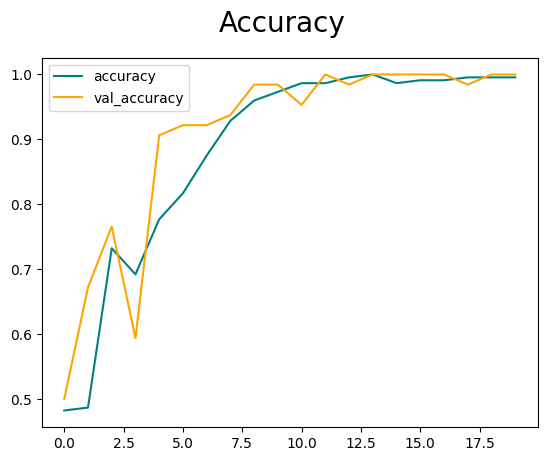

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-06-06 15:35:56.044094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]
2023-06-06 15:35:56.044393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [305]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 80ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

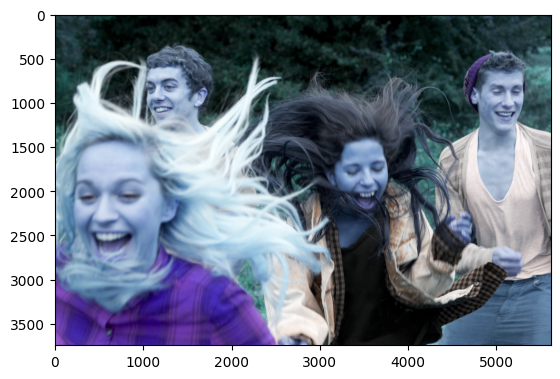

In [36]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

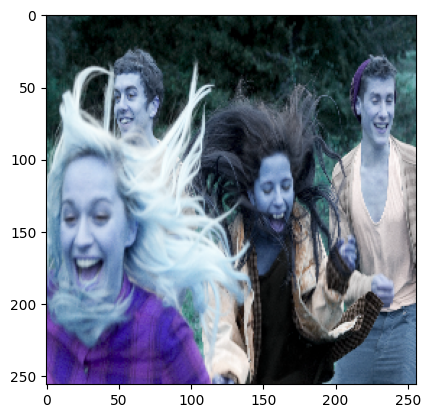

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [39]:
yhat

array([[1.7278929e-06]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

In [44]:
new_model = load_model('models/imageclassifier.h5')

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


array([[1.7278929e-06]], dtype=float32)